In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
import os

In [2]:
colorImagesDirectory = os.listdir("landscape Images/color")
grayImagesDirectory = os.listdir("landscape Images/gray")

colorImagesPath = 'landscape Images/color/'
grayImagesPath = 'landscape Images/gray/'

colorImages = []
grayImages = []

for image in colorImagesDirectory:
    img = cv2.imread(colorImagesPath + image)
    img = cv2.cvtColor(img , cv2.COLOR_BGR2RGB)
    resizedImage = cv2.resize(img, (128, 128))
    resizedImage = resizedImage.astype(np.float32) / 255.0
    colorImages.append(resizedImage)

for image in grayImagesDirectory:
    img = cv2.imread(grayImagesPath + image)
    img = cv2.cvtColor(img , cv2.COLOR_BGR2GRAY)
    resizedImage = cv2.resize(img, (128, 128))
    resizedImage = resizedImage.astype(np.float32) / 255.0
    grayImages.append(resizedImage)

colorImages = np.array(colorImages)
grayImages = np.array(grayImages)

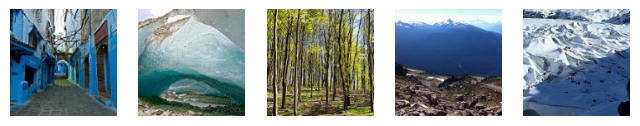

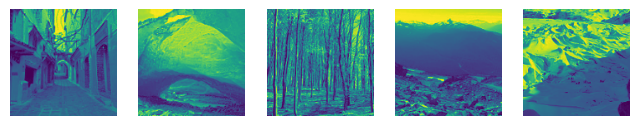

In [3]:
imageCount = len(colorImages)
imageShape = colorImages[0].shape

randomIndices = np.random.choice(imageCount , size = 5 , replace = False)

fig , axis = plt.subplots(1 , 5 , figsize = (8 , 4))

for idx , i in enumerate(randomIndices):
    img = colorImages[i]
    axis[idx].imshow(img)
    axis[idx].axis('off')

fig , axis = plt.subplots(1 , 5 , figsize = (8 , 4))
for idx , i  in enumerate(randomIndices):
    img = grayImages[i]
    axis[idx].imshow(img)
    axis[idx].axis('off')


In [4]:
trainSize = int(imageCount * 0.85)

colorImagesTrain = colorImages[:trainSize]
colorImagesTest = colorImages[trainSize::]

grayImagesTrain = grayImages[:trainSize]
grayImagesTest = grayImages[trainSize::]

In [5]:
inputTensor  = tf.keras.layers.Input(shape=(128 , 128 , 1))

#Encoder
s1 = tf.keras.layers.Conv2D(32 , 3 , activation='relu' , padding = 'same')(inputTensor)
s1 = tf.keras.layers.Conv2D(32 , 3 , activation='relu' , padding = 'same')(s1)
p1 = tf.keras.layers.MaxPooling2D(pool_size=(2,2))(s1)

s2 = tf.keras.layers.Conv2D(64 , 3 , activation='relu' , padding = 'same')(p1)
s2 = tf.keras.layers.Conv2D(64 , 3 , activation='relu' , padding = 'same')(s2)
p2 = tf.keras.layers.MaxPooling2D(pool_size=(2,2))(s2)

s3 = tf.keras.layers.Conv2D(128 , 3 , activation='relu' , padding = 'same')(p2)
s3 = tf.keras.layers.Conv2D(128 , 3 , activation='relu' , padding = 'same')(s3)
p3 = tf.keras.layers.MaxPooling2D(pool_size=(2,2))(s3)

s4 = tf.keras.layers.Conv2D(256 , 3 , activation='relu' , padding = 'same')(p3)
s4 = tf.keras.layers.Conv2D(256 , 3 , activation='relu' , padding = 'same')(s4)
p4 = tf.keras.layers.MaxPooling2D(pool_size=(2,2))(s4)


b1 = tf.keras.layers.Conv2D(32 , 3 , activation = 'relu' , padding = 'same')(p4)
b1 = tf.keras.layers.Conv2D(32 , 3 , activation = 'relu' , padding = 'same')(b1)


# decoder
d1 = tf.keras.layers.Conv2D(256 , 2 , activation='relu' , padding = 'same')(tf.keras.layers.UpSampling2D( size=(2 , 2) ) (b1) ) 
d1 = tf.keras.layers.concatenate([s4 , d1] , axis = 3)
d1 = tf.keras.layers.Conv2D(256 , 3 , activation='relu' , padding = 'same')(d1)
d1 = tf.keras.layers.Conv2D(256 , 3 , activation='relu' , padding = 'same')(d1)

d2 = tf.keras.layers.Conv2D(128 , 2 , activation='relu' , padding = 'same')(tf.keras.layers.UpSampling2D( size=(2 , 2) ) (d1) ) 
d2 = tf.keras.layers.concatenate([s3 , d2] , axis = 3)
d2 = tf.keras.layers.Conv2D(128 , 3 , activation='relu' , padding = 'same')(d2)
d2 = tf.keras.layers.Conv2D(128 , 3 , activation='relu' , padding = 'same')(d2)

d3 = tf.keras.layers.Conv2D(64 , 2 , activation='relu' , padding = 'same')(tf.keras.layers.UpSampling2D( size=(2 , 2) ) (d2) ) 
d3 = tf.keras.layers.concatenate([s2 , d3] , axis = 3)
d3 = tf.keras.layers.Conv2D(64 , 3 , activation='relu' , padding = 'same')(d3)
d3 = tf.keras.layers.Conv2D(64 , 3 , activation='relu' , padding = 'same')(d3)

d4 = tf.keras.layers.Conv2D(32 , 2 , activation='relu' , padding = 'same')(tf.keras.layers.UpSampling2D( size=(2 , 2) ) (d3) ) 
d4 = tf.keras.layers.concatenate([s1 , d4] , axis = 3)
d4 = tf.keras.layers.Conv2D(32 , 3 , activation='relu' , padding = 'same')(d4)
d4 = tf.keras.layers.Conv2D(32 , 3 , activation='relu' , padding = 'same')(d4)



output = tf.keras.layers.Conv2D(3 , 1 , padding = 'same')(d4)



model = tf.keras.Model(inputs = inputTensor , outputs = output)

model.summary()






Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 128, 128, 1)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 128, 128, 32)         320       ['input_1[0][0]']             
                                                                                                  
 conv2d_1 (Conv2D)           (None, 128, 128, 32)         9248      ['conv2d[0][0]']              
                                                                                                  
 max_pooling2d (MaxPooling2  (None, 64, 64, 32)           0         ['conv2d_1[0][0]']            
 D)                                                                                           

In [6]:
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
        filepath= 'model1.h5',       
        monitor='loss',             
        save_best_only=True,             
        save_weights_only=False,        
        verbose=1
    )


model.compile(loss = tf.keras.losses.MeanSquaredError() , optimizer=tf.keras.optimizers.Adam())

history = model.fit(x = tf.expand_dims(grayImagesTrain , axis = -1) , y = colorImagesTrain , validation_data = (tf.expand_dims(grayImagesTest , axis = -1) , colorImagesTest) ,
                  callbacks=[checkpoint_callback] ,
                      epochs = 20) 

Epoch 1/20
190/190 [==============================] - ETA: 0s - loss: 0.0215
Epoch 1: loss improved from inf to 0.02149, saving model to model1.h5


c:\Users\abdel\anaconda3\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


190/190 [==============================] - 1172s 6s/step - loss: 0.0215 - val_loss: 0.0070
Epoch 2/20
190/190 [==============================] - ETA: 0s - loss: 0.0063
Epoch 2: loss improved from 0.02149 to 0.00627, saving model to model1.h5
190/190 [==============================] - 1170s 6s/step - loss: 0.0063 - val_loss: 0.0056
Epoch 3/20
190/190 [==============================] - ETA: 0s - loss: 0.0058
Epoch 3: loss improved from 0.00627 to 0.00581, saving model to model1.h5
190/190 [==============================] - 1150s 6s/step - loss: 0.0058 - val_loss: 0.0054
Epoch 4/20
190/190 [==============================] - ETA: 0s - loss: 0.0058
Epoch 4: loss improved from 0.00581 to 0.00576, saving model to model1.h5
190/190 [==============================] - 1145s 6s/step - loss: 0.0058 - val_loss: 0.0059
Epoch 5/20
190/190 [==============================] - ETA: 0s - loss: 0.0055
Epoch 5: loss improved from 0.00576 to 0.00552, saving model to model1.h5
190/190 [=======================

In [ ]:
prediction = model.predict(tf.expand_dims(grayImagesTest, axis = -1) )

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


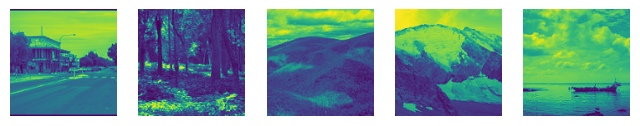

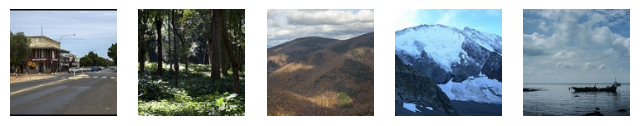

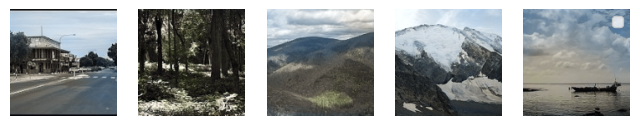

In [11]:

imageCount = len(prediction)

randomIndices = np.random.choice(imageCount , size = 5 , replace = False)

# gray scale image
fig , axis = plt.subplots(1 , 5 , figsize = (8 , 4))
for idx , i in enumerate(randomIndices):
    img = grayImagesTest[i]
    axis[idx].imshow(img)
    axis[idx].axis('off')


# realy Image
fig , axis = plt.subplots(1 , 5 , figsize = (8 , 4))
for idx , i in enumerate(randomIndices):
    img = colorImagesTest[i]
    axis[idx].imshow(img)
    axis[idx].axis('off')


# Model prediction
fig , axis = plt.subplots(1 , 5 , figsize = (8 , 4))
for idx , i  in enumerate(randomIndices):
    img = prediction[i]
    axis[idx].imshow(img)
    axis[idx].axis('off')


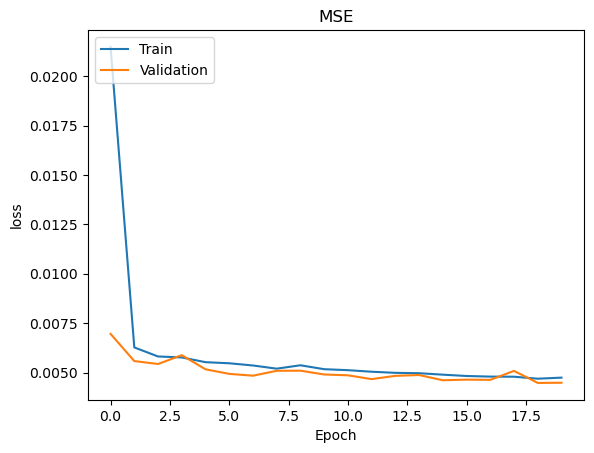

In [13]:
def plot_training_history(history):
    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('MSE')
    plt.ylabel('loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()


plot_training_history(history)